# Section 1: Introduction
  
The popularity of smartphones has increased greatly every year since the release of the first smart phone, with approximately 10 billion (https://www.statista.com/) smartphones sold worldwide since then. This is 40% of the global population. Additionally, Android phones enjoy about 85% of the smart phone market share globally (https://www.statista.com/). Since the meteoric rise of the smartphone and tech industries, many app developers have taken the opportunity to develop their own apps for different operating systems and made available to download on multiple platforms. Google Play Store is one of the main platforms and has 2.7 billion apps available (https://www.statista.com/). On average, people spend around 3 hours a day on their phones (https://hackernoon.com/). Due to the huge popularity of apps, there is a wide variety of genres available for every type of audience with a wide range of pricing. Since many people invest so much time and effort into apps, app data has become an interesting and relevant topic to conduct research on.
  
This report focuses mainly on a sample of apps from the Google Play Store, where the composition of this sample will be analysed in depth and modeled to predict and classify app ratings. The rest of section 1 will describe our project objectives as well as the dataset. Section 2 will cover our pre-processing methods. Section 3 will go through exploratory data analysis. Section 4 will focus on our model building and evaluation. Finally, we will wrap up with our results and conclusions.

## Section 1.1: Project Objectives  
  
Our objectives for our project with the Google Play Store data encompass the following areas:
- To build data models for predicting ratings of the google store applications. 
- Compare models and their accuracies for the features we chose.
- Applications: 
    - Developer: 
        - What kind of app to build ?
        - Models allow developers to put different variables together and predict scores of apps. 
    - Customer: 
        - Higher rating can be used in advertisement for business users. 
        - Recommend free instead of paid ones providing same function and same service for individual users

## Section 1.2: About the Data
  
Our data was downloaded from Kaggle (https://www.kaggle.com/lava18/google-play-store-apps) and contains 13 variables with 10,841 rows:  
  
- App: 9660 Unique Values
- Category: 18% Family, 11% Games...
- Rating: 0 to 5 scale range
- Reviews: Every App has a count
- Size: In MBs
- Installs: 10k -10M
- Type: Paid & Free
- Price: Free (93%) to Paid (7%)
- Content Rating: Everyone, Teens....
- Genres: 130 Unique Values
- Last Updated : Date
- Current Version of App: Varies
- Android Version of Phone: Varies

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
import math
import os

In [8]:
filepath1 ='C:/Users/sjg27/OneDrive/Documents/GitHub/6103Project/googleplaystore.csv'
pdata = pd.read_csv(filepath1)

In [9]:
# Establish standard quick checks
def dfChkBasics(dframe): 
  cnt = 1  
  try:
    print(str(cnt)+': info(): ')
    print(dframe.info())
  except: pass

  cnt+=1
  print(str(cnt)+': describe(): ')
  print(dframe.describe())

  cnt+=1
  print(str(cnt)+': dtypes: ')
  print(dframe.dtypes)

  try:
    cnt+=1
    print(str(cnt)+': columns: ')
    print(dframe.columns)
  except: pass

  cnt+=1
  print(str(cnt)+': head() -- ')
  print(dframe.head())

  cnt+=1
  print(str(cnt)+': shape: ')
  print(dframe.shape)

  # cnt+=1
  # print(str(cnt)+': columns.value_counts(): ')
  # print(dframe.columns.value_counts())

def dfChkValueCnts(dframe):
  cnt = 1
  for i in dframe.columns :
    print(str(cnt)+':', i, 'value_counts(): ')
    print(dframe[i].value_counts())
    cnt +=1

Before beginning the pre-processing phase, we do a quick check of the data in order to get an idea of what we will be working with.

In [6]:
# Do a quick check of the dataset

dfChkBasics(pdata)
dfChkValueCnts(pdata)

1: info(): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
2: describe(): 
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
3: dtypes: 
App                object
Category           object
Rating            float64
Reviews            objec

# Section 2: Pre-Processing  

## Section 2.1: Clean duplicate values  
  
First, we will check for duplicate values in the App column.

In [23]:
# Show duplicate App names
Apps = pdata["App"]
duplicateRows = Apps[Apps.isin(Apps[Apps.duplicated()])]
print("Duplicate Rows in App name are:", duplicateRows, sep='\n')

Duplicate Rows in App name are:
1                                   Coloring book moana
23                               Mcqueen Coloring pages
36       UNICORN - Color By Number & Pixel Art Coloring
42                           Textgram - write on photos
139                                Wattpad 📖 Free Books
                              ...                      
10715                                FarmersOnly Dating
10720                Firefox Focus: The privacy browser
10730                                       FP Notebook
10753                    Slickdeals: Coupons & Shopping
10768                                              AAFP
Name: App, Length: 1979, dtype: object


There are duplicates in App names, so we will drop them. We will keep the last row of duplicates because they are the most recent version of the App.

In [24]:
# Remove duplicate rows for App names
pdatac = pdata.drop_duplicates(subset=['App'], keep = 'last')
print(pdatac.shape)
print(pdatac.info())

(9660, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB
None


## Section 2.2: Clean NaN values  
  
Next, we will check for NaN values in the whole dataset.

In [25]:
# Table of NaN values
NanValues = pd.DataFrame(pdatac, columns = pdatac.columns)
NanChart = NanValues.isnull().sum()
NanChart

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

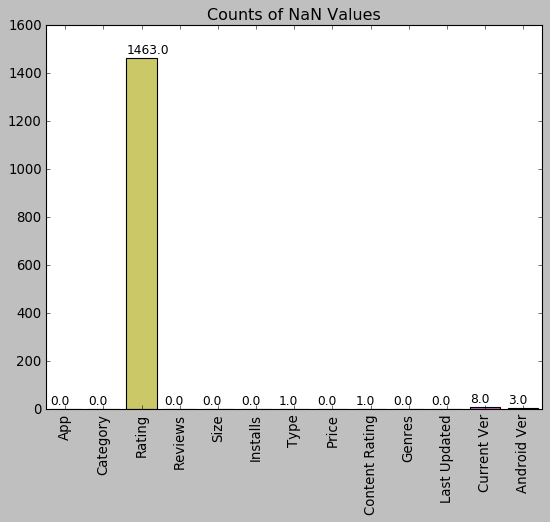

In [32]:
# Chart of NaN values

fig = sns.barplot(x=NanChart.index,y=NanChart.values, palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title('Counts of NaN Values')

for i in fig.patches:
  fig.text(i.get_x(), i.get_height() + 20, \
      str(round((i.get_height()), 0)), fontsize=11, color='black', rotation=0)

plt.show(fig)

We will remove the NaN values so that we have a clean dataset to work with. We are choosing to remove NaN values instead of replacing them because there is still plenty of clean data to work with.

In [34]:
# Remove rows with NaN values
pdata_clean = pdatac.dropna()
pdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


We now have 8190 unique rows in our Google Play Store data.

# Section 3: Exploratory Data Analysis

# Section 4: Modeling & Evaluation

# Section 5: Conclusion